# HW5 Pandas, Linear Regression (100 + 15 points)

In [1]:
# import necessary modules for the homework. 
# Additional modules can imported if needed.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats 
import sklearn.linear_model as lm
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse

## Q1. Pandas plots, probability models (30 pts - 3 pts each question)

### Q1.1 Use pandas to load hw5q1.xlsx file (locally or from github) into a dataframe. The first line in the excel file is column header, and the excel file does not have any column as row index. Show the shape of the data frame and verify that your dataframe has 1000 rows and 4 columns.*italicized text*

In [54]:
url='hw5q1.xlsx'
data_table = pd.read_excel(url,header=0)
data_table.shape

(1000, 4)

### Q1.2 Show the column labels of the data frame

In [55]:
list(data_table.columns)

['a', 'b', 'c', 'd']

### Q1.3 Show the row index of the data frame

In [56]:
list(data_table.index)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


### Q1.4 Change the column labels to upper case letters, 'A', 'B', 'C', 'D'.

In [57]:
data_table = data_table.rename(columns = {"a":"A","b":"B","c":"C","d":"D"})
list(data_table.columns)

['A', 'B', 'C', 'D']

### Q1.5 Use pandas describe() function to show summary statistics of the data frame (FYI, compare the numbers with the boxplot in Q1.6.)

In [22]:
data_table.describe()

,A,B,C,D
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.993356,2.960433,2.786134,4.158032
std,1.009219,3.131134,0.711737,7.951631
min,0.876039,0.000909,1.056609,2.000620
25%,3.271742,0.763997,2.274519,2.321567
50%,4.042064,1.983874,2.699545,2.919469
75%,4.705365,4.042860,3.202333,4.013069
max,6.870148,24.173974,6.032348,157.940206


### Q1.6. Show a boxplot of the data.

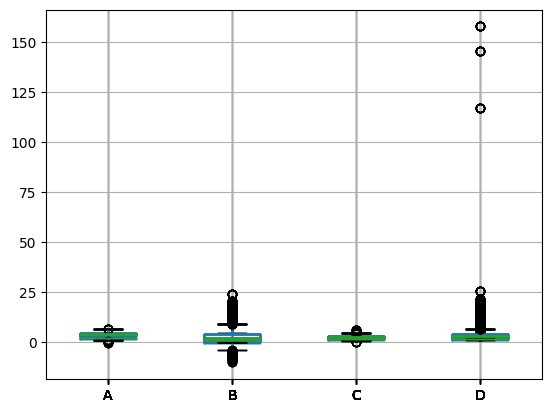

In [44]:
boxplot1 = data_table.boxplot()
plt.show()

### Q1.7 Apply log2 transformation (with applymap and np.log2) to the data and show the boxplot.

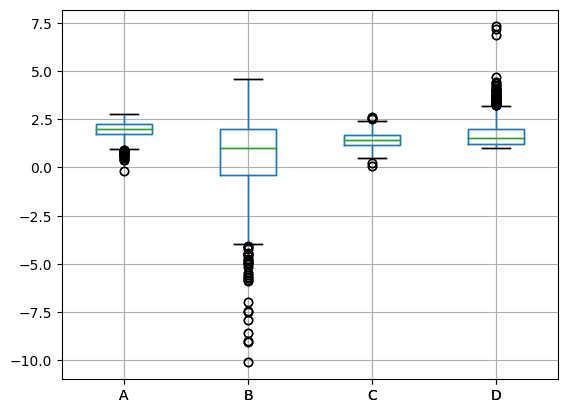

In [46]:
data_table_log = data_table.applymap(np.log2)

data_table_log.boxplot()

plt.show()

### Q1.8. Use pandas function hist to show the histogram of each column of the data frame. (Use option density = True so it plots probability instead of counts.)

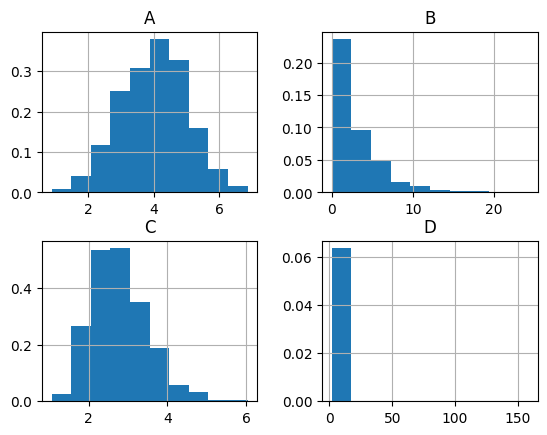

In [47]:
data_table.hist(density = True)
plt.show()

### Q1.9 Use pandas function hist to show the histogram of the log transformed data frame. (Use option density = True so it plots probability instead of counts.)

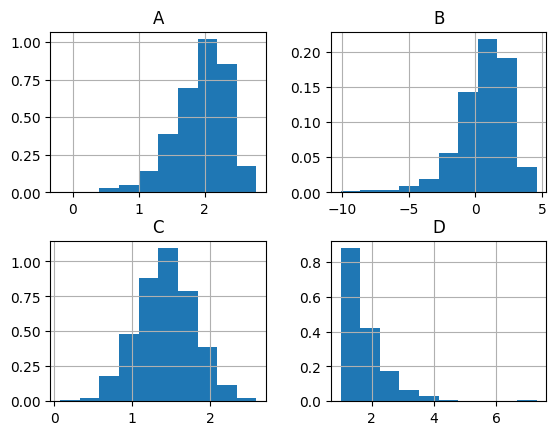

In [48]:
data_table_log.hist(density = True)
plt.show()

### Q1.10. Based on the information and plots you obtained above, which column do you think is from normal distribution and which column is from log normal distribution? (FYI: data in the four columns come from four different distributions we discussed in class: normal, lognormal, exponential, and pareto. See slides 4.1-stats.pptx page 27-49.).


Show your answer here: A = Normal, B = Exponential, C = Lognormal, D = Pareto

## Q2. Pandas DataFrame operations (40 points)

### Q2a (6 pts) Load data stored in brfss.csv (locally or from github) into a python DataFrame. The first line in the file is column header, and the first column in the file is row index. First drop the 'wtkg2' and ‘wtyrago’ column, and then drop the rows that have any NaN values. (Why the order matters?) Change the sex column so that True means male and False means female. (Originally, sex == 2 means female and sex == 1 means male.) Rename the columns to age, weight, height, and isMale. Name the final DataFrame as brfss. Print out the shape (number of rows and columns) of brfss (you should have 393518 rows).

In [2]:
url2 = 'brfss.csv'
data_table2 = pd.read_csv(url2,header=0,index_col=0)


data_table2_1 = data_table2.drop(["wtkg2","wtyrago"],axis= 1)

data_table2_2 = data_table2_1.dropna()

data_table2_2['sex'] = data_table2_2['sex'].replace(to_replace= [1,2], value=["male","female"])

brfss =  data_table2_2.rename(columns = {"weight2":"weight","htm3":"height","sex":"isMale"})


brfss.shape


C:\Users\Kim_J\AppData\Local\Temp\ipykernel_20684\3590782231.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table2_2['sex'] = data_table2_2['sex'].replace(to_replace= [1,2], value=["male","female"])


(393518, 4)

### Q2b. (30 pts – 3 pts each) Based on the DataFrame brfss, print out answers to the following questions using pandas DataFrame functionality

#### i. What is the median age for people in the dataset?

In [77]:
brfss['age'].median()

55.0

#### ii.	What is the max height for people in the dataset?

In [78]:
brfss['height'].max()

236.0

#### iii.	What is the median height for male in the dataset? 

In [79]:
brfss.loc[brfss['isMale'] == 'male', 'height'].median()

178.0

#### iv.	What is the median height for female in the dataset? 

In [80]:
brfss.loc[brfss['isMale'] == 'female', 'height'].median()

163.0

#### v.	What is the mean weight for male <= 55 years old?

In [103]:
brfss_male = brfss.loc[brfss['isMale'] == 'male']

old = brfss_male.loc[brfss_male['age'] <= 55,'weight'].mean()
old_df = brfss_male.loc[brfss_male['age'] <= 55,'weight']

young = brfss_male.loc[brfss_male['age'] > 55,'weight'].mean()
young_df = brfss_male.loc[brfss_male['age'] > 55,'weight']
print(old)

90.16327635033649


#### (bonus 4 pts) Use t-test to compare the weights for male <= 55 years old and male > 55 years old and report the t-statistic and p-value. Which group is heavier and is the difference statistically significant? 

In [106]:

print(young)
print(old)
var = scipy.stats.ttest_ind(young_df,old_df)
print(var[1])
print("There is a difference since the p-value above is extremely small")

87.88260428449524
90.16327635033649
9.032608028299036e-132
There is a difference since the p-value above is extremely small


#### vi.	How many females are in the dataset?

In [128]:
(brfss['isMale'] == 'female').sum()


240932

#### vii.	How many male in the dataset has height > 190cm and weight < 50kg?

In [133]:
brfss_2 = brfss.loc[ (brfss['isMale'] == 'male') & (brfss['height'] > 190) & (brfss['weight'] < 50)]
len(brfss_2)

3

#### viii.	What is the average height of males whose weight is 70kg?

In [134]:
brfss_male.loc[brfss_male['weight'] == 70, 'height'].mean()

172.77258566978193

#### ix.	Print out row 2001 to row 2010 (inclusive, a total of ten rows) from the dataframe. (Note: use position-based indexing. Pay attention to the total number of rows - 10 expected, and the index of each row - do you expect 2001 or 2010 to be in the list?)

In [109]:
brfss.iloc[2001:2011]

,age,weight,height,isMale
2095,69.0,54.545455,163.0,female
2096,68.0,66.363636,170.0,female
2097,38.0,81.818182,165.0,female
2098,91.0,59.090909,152.0,female
2099,72.0,84.090909,160.0,female
2100,85.0,118.636364,178.0,male
2101,65.0,51.818182,150.0,female
2102,79.0,76.363636,170.0,male
2103,77.0,64.545455,163.0,female
2104,73.0,73.181818,160.0,female


#### x.	Print out rows with index from 2001 to 2010 (inclusive, including 2001 and 2010). (Note: this is label-based indexing. Pay attention to the row indices and the number of rows displayed. Hint - you should see less than 10 rows due to NaNs being dropped out from the dataframe in 2a.)

In [114]:
brfss.loc[2001:2010],

(       age      weight  height  isMale
 2001  54.0   90.000000   188.0    male
 2002  29.0   79.545455   175.0  female
 2004  30.0   90.909091   152.0  female
 2005  37.0   59.090909   165.0  female
 2006  25.0   97.727273   180.0  female
 2007  43.0   62.727273   165.0  female
 2008  40.0  100.909091   165.0  female
 2009  51.0   70.454545   157.0  female
 2010  45.0   85.000000   160.0  female,)

## Q3. Simple and multiple linear regression (45 points. Useful examples on slides #24, 35, etc.)

### Q3a. (10 pts) From the brfss DataFrame created in Q2a, use the height column as Y, and weight column as X to perform a simple linear regression (See 6-regression.ppt slide #23, lr.fit). Print out the equation that is obtained by the linear regression in the form of “height = a + b * weight” (replace a and b with the values obtained from the linear regression, lr.intercept_ and lr.coef_.) (Note: you need to either make X a DataFrame or reshape X to be a n x 1 numpy array using reshape(-1, 1); see simpleRegression.ipynb.)

In [138]:
x = np.array(brfss['weight']).reshape(-1, 1)  # need to make sure that x is a 2d array. 
y = np.array(brfss['height'])

lr = lm.LinearRegression()
lr.fit(x, y)

print('Linear equatation: y = %.3f + %.3fx' %(lr.intercept_, lr.coef_))



alpha = 147.606
beta = 0.270
Linear equatation: y = 147.606 + 0.270x


### Q3b. (4 pts) Use the linear regression object that you obtained in 3a to predict the height of an individual whose weight is 70kg (with lr.predict). Print out the predicted height. (As in 3a, make the value 70 a dataframe or a 1x1 numpy 2d array. You'll likely see a warning that says the data frame does not have a feature name - you can either ignore the warning, to copy the .columns attribute from the dataframe X to the new single-element dataframe.)

In [140]:
X_test = np.array([70]).reshape(-1, 1) 
lr.predict(X_test)

array([166.51184435])

### Q3c (6 pts) Compute the MSE and R-square of the simple linear regression. (Slide #23, Imported as r2 and mse.)

In [142]:
pred = lr.predict(x) 

print('r2 = %.3f' % r2(y, pred))
print('mse = %.3f' % mse(y, pred))


r2 = 0.258
mse = 80.106


### Q3d. (10 pts) From the brfss DataFrame above, use the height column as Y, and two columns, weight and isMale, as X, to perform a multiple linear regression (slides #34). Print out the equation that is obtained by the linear regression in the form of “height = a + b * weight + c * isMale” (replace a, b and c with the values in lr.intercept_ and lr.coef_.) (FYI: compare the a, b, c values from the a, b values from Q3a.)

In [16]:

male = pd.get_dummies(brfss['isMale'], drop_first=True)

x = brfss['weight']
y = np.array(brfss['height'])

x2 = pd.concat([x, male['male']],axis = 1)

lr2 = lm.LinearRegression()
lr2.fit(x2, y)


print('Linear equatation: height = %.3f + %.3f*weight + %.3f*isMale ' %(lr2.intercept_, lr2.coef_[0],lr2.coef_[1]))

Linear equatation: height = 152.792 + 0.143*weight + 12.553*isMale 


### Q3e (3 pts) Use the linear regression object that you obtained in 3d to predict the height of a male whose weight is 70kg. Print out the predicted height.

In [23]:
X2_test = np.array([70,1]).reshape(-1, 2) 
lr2.predict(X2_test)

c:\Users\Kim_J\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([175.3518648])

### Q3f. (3 pts) Use the linear regression object that you obtained in 3d to predict the height of a female whose weight is 70kg. Print out the predicted height. (Just FYI, what is the difference between this predicted value and the one in Q3e? Is it equal to the coefficient c you obtained in Q3d?)

In [26]:
X3_test = np.array([70,0]).reshape(-1, 2) 
print(lr2.predict(X3_test))

print("The difference is roughly equal to the coefficient")

[162.79908821]
The difference is roughly equal to the coefficient


c:\Users\Kim_J\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Q3g (4 pts) Compute the MSE and R-square of the multiple linear regression. (FYI: how do these two values compare with the values from Q3c?)

In [29]:
pred2 = lr2.predict(x2) 
print('r2 = %.3f' % r2(y, pred2))
print('mse = %.3f' % mse(y, pred2))

print("R2 is higher so there is more correlation and mse is lower so the model has less error.")

r2 = 0.547
mse = 48.878


### (Bonus: 5 points) Repeat 3d and 3g, using weight, isMale, and age as X variables to predict height. Print out the linear equation, and report the R2 as well as MSE. (Just FYI, compare these numbers to the numbers you obtained from the previous two models. Is age an important predictor? What techniques you might use to gain some confidence of the importance of each predictor?)

In [39]:

x3 = pd.concat([x2, brfss['age']],axis = 1)

lr3 = lm.LinearRegression()
lr3.fit(x3, y)


print('Linear equatation: height = %.3f + %.3f*weight + %.3f*isMale + %.3f*Age  ' %(lr3.intercept_, lr3.coef_[0],lr3.coef_[1],lr3.coef_[2]))

pred3 = lr3.predict(x3) 

print('r2 = %.3f' % r2(y, pred3))
print('mse = %.3f' % mse(y, pred3))

print("Age is an okay predictor. The R2 goes up but the mse does not change")

Linear equatation: height = 156.041 + 0.139*weight + 12.552*isMale + -0.054*Age  
r2 = 0.555
mse = 48.078
Age is an okay predictor. The R2 goes up but the mse does not change
